In [1]:
# This script is for OSL Modelling
# Take Dataset 3 LA for example

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_sociodemo_std_test_passed_2 = pd.read_csv("../Data/01 Processed Dataset/Complete_LA.csv")
X_sociodemo_std_test_passed_1 = X_sociodemo_std_test_passed_2.set_index('GEOID')
y = X_sociodemo_std_test_passed_1.pop('obesity_cr')

In [4]:
X_sociodemo_std_test_passed_1.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
6037137504,0.009165,0.013025,0.015919,0.000000,0.030873,0.502653,0.550339,0.104197,0.093102,0.112880,...,0.027916,0.043415,0.010086,1185500,1968,0.025937,540.339075,0.808312,0.924512,0.798134
6037138000,0.071474,0.002354,0.071260,0.000000,0.084100,0.514659,0.604255,0.084314,0.126471,0.148727,...,0.073945,0.082602,0.003363,832900,1966,0.172646,1045.182340,0.626115,0.869126,0.754610
6037139200,0.026199,0.000000,0.143836,0.000000,0.227740,0.440925,0.406014,0.153767,0.171062,0.112158,...,0.080120,0.103082,0.028545,560600,1971,0.429098,5070.897045,0.697122,0.827326,0.570550
6037143200,0.091449,0.000000,0.061758,0.006888,0.128029,0.444893,0.334596,0.194299,0.259145,0.160095,...,0.096330,0.108076,0.053769,693300,1977,0.712914,4400.511337,0.474305,0.630256,0.466741
6037143300,0.070877,0.003863,0.072214,0.000000,0.188707,0.484695,0.436177,0.154532,0.158544,0.207875,...,0.059385,0.057219,0.015098,810100,1968,0.595567,4068.456711,0.607633,0.982546,0.762392


In [5]:
len(X_sociodemo_std_test_passed_1), len(y)

(947, 947)

In [6]:
len(X_sociodemo_std_test_passed_1.columns), X_sociodemo_std_test_passed_1.columns

(24,
 Index(['% Black', '% Ame Indi and AK Native', '% Asian',
        '% Nati Hawa and Paci Island', '% Hispanic or Latino', '% male',
        '% married', '% age 18-29', '% age 30-39', '% age 40-49', '% age 50-59',
        '% age >=60', '% <highschool', 'median income', '% unemployment',
        '% below poverty line', '% food stamp/SNAP', 'median value units built',
        'median year units built', '% renter-occupied housing units',
        'population density', 'fafood', 'fitness', 'park'],
       dtype='object'))

In [7]:
y.head()

GEOID
6037137504    22.0
6037138000    23.4
6037139200    24.7
6037143200    23.5
6037143300    23.1
Name: obesity_cr, dtype: float64

In [8]:
# Standardization function
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

X_sociodemo_std_test_passed_stats = X_sociodemo_std_test_passed_1.describe().transpose()
X_sociodemo_std_test_passed_3 = standarize_data(X_sociodemo_std_test_passed_1,X_sociodemo_std_test_passed_stats)

In [9]:
X_sociodemo_std_test_passed_3.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
6037137504,-0.616669,0.426985,-0.879990,-0.328896,-1.552954,0.232056,1.363202,-1.106486,-1.334160,-0.785511,...,-1.316025,-1.230185,-1.080946,1.547590,0.667345,-2.314824,-1.215061,0.336278,1.139070,1.256985
6037138000,-0.102840,-0.384194,-0.399324,-0.328896,-1.368205,0.566856,1.929205,-1.359717,-0.682778,0.377067,...,0.115736,-0.890121,-1.155388,0.544761,0.515519,-1.732550,-1.110385,-0.442527,0.970044,1.026353
6037139200,-0.476206,-0.563141,0.231026,-0.328896,-0.869638,-1.489375,-0.151915,-0.475147,0.187641,-0.808938,...,0.307803,-0.712396,-0.876563,-0.229687,0.895084,-0.714718,-0.275676,-0.139007,0.842484,0.051021
6037143200,0.061879,-0.563141,-0.481859,0.948298,-1.215732,-1.378706,-0.901652,0.041081,1.907053,0.745761,...,0.812046,-0.669060,-0.597278,0.147725,1.350563,0.411722,-0.414676,-1.091446,0.241080,-0.499065
6037143300,-0.107769,-0.269454,-0.391042,-0.328896,-1.005118,-0.268735,0.164743,-0.465406,-0.056711,2.295358,...,-0.337175,-1.110392,-1.025456,0.479916,0.667345,-0.054017,-0.483526,-0.521530,1.316172,1.067590


In [10]:
#Sociodemographic predictors
#fit OLS model
X_sociodemo_std_test_passed = X_sociodemo_std_test_passed_3.drop(columns=['fitness','park','fafood'])
X_sociodemo_std_test_passed_constant = sm.add_constant(X_sociodemo_std_test_passed)

model = sm.OLS(y, X_sociodemo_std_test_passed_constant).fit() # this is an OLS object
model.summary2()

C:\Users\ryanz\anaconda3\envs\Obesity\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                    OLS                  Adj. R-squared:         0.962    
Dependent Variable:       obesity_cr           AIC:                    2811.5830
Date:                     2022-04-20 17:55     BIC:                    2918.3555
No. Observations:         947                  Log-Likelihood:         -1383.8  
Df Model:                 21                   F-statistic:            1152.    
Df Residuals:             925                  Prob (F-statistic):     0.00     
R-squared:                0.963                Scale:                  1.1142   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           27.4290   0.0343 799.6712 0.0000 27.3617 27.4964
% Black                          1.4021   0.0459  30.5225 0.0000  1.3119  1.4922
% Ame Indi and AK Native         0.0254   0.0359   0.7077 0.4793 -0.0450  0.0957
% Asian                         -1.5243   0.0455 -33.4972 0.0000 -1.6137 -1.4350
% Nati Hawa and Paci Island     -0.0254   0.0351  -0.7231 0.4698 -0.0943  0.0435
% Hispanic or Latino             1.4916   0.1188  12.5518 0.0000  1.2584  1.7249
% male                           0.0322   0.0375   0.8574 0.3915 -0.0415  0.1058
% married                        0.0754   0.0711   1.0600 0.2894 -0.0642  0.2149
% age 18-29                     -0.7830   0.0841  -9.3093 0.0000 -0.9480 -0.6179
% age 30-39                     -0.2279   0.0639  -3.5668 0.0004 -0.3533 -0.1025
% age 40-49                     -0.0740   0.0489  -1.5128 0.1307 -0.1701  0.0220
% age 50-59                      0.0998   0.0487   2.0473 0.0409  0.0041  0.1954
% age >=60                      -0.1988   0.0775  -2.5655 0.0105 -0.3509 -0.0467
% <highschool                    0.6531   0.1233   5.2970 0.0000  0.4111  0.8951
median income                   -0.4374   0.0904  -4.8392 0.0000 -0.6148 -0.2600
% unemployment                   0.0928   0.0385   2.4068 0.0163  0.0171  0.1684
% below poverty line             1.2021   0.0704  17.0809 0.0000  1.0640  1.3402
% food stamp/SNAP                0.5798   0.0826   7.0232 0.0000  0.4178  0.7418
median value units built        -0.3152   0.0660  -4.7755 0.0000 -0.4447 -0.1857
median year units built         -0.0855   0.0427  -2.0017 0.0456 -0.1692 -0.0017
% renter-occupied housing units  0.2384   0.0817   2.9159 0.0036  0.0779  0.3988
population density               0.0041   0.0487   0.0839 0.9332 -0.0914  0.0996
--------------------------------------------------------------------------------
Omnibus:                  72.001            Durbin-Watson:               1.883  
Prob(Omnibus):            0.000             Jarque-Bera (JB):            248.506
Skew:                     -0.296            Prob(JB):                    0.000  
Kurtosis:                 5.439             Condition No.:               12     
================================================================================

"""

In [11]:
len(X_sociodemo_std_test_passed_constant.columns)
#y.head()

22

In [12]:
# RMSE of the stats model
from statsmodels.tools.eval_measures import rmse
# now generate predictions
ypred = model.predict(X_sociodemo_std_test_passed_constant)
# calc rmse of the model without diet and physical activity info
RMSE = rmse(y, ypred)
RMSE

1.0432058402788809

In [13]:
len(X_sociodemo_std_test_passed_3.columns)

24

In [14]:
# now let's add diet and physical activity measurements
# First VIF test with diet and physical activity measurements
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_sociodemo_std_test_passed_3
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            feature        VIF
0                           % Black   1.924207
1          % Ame Indi and AK Native   1.105083
2                           % Asian   1.899372
3       % Nati Hawa and Paci Island   1.051507
4              % Hispanic or Latino  13.711279
5                            % male   1.199162
6                         % married   4.338779
7                       % age 18-29   6.070442
8                       % age 30-39   3.619014
9                       % age 40-49   2.051052
10                      % age 50-59   2.028973
11                       % age >=60   5.151873
12                    % <highschool  13.233933
13                    median income   7.524484
14                   % unemployment   1.274762
15             % below poverty line   4.314166
16                % food stamp/SNAP   5.825120
17         median value units built   4.525719
18          median year units built   1.641297
19  % renter-occupied housing units   5.843214
20           

In [15]:
# OLS with adding with diet and physical activity measurements
X_sociodemo_std_test_passed_3_constant = sm.add_constant(X_sociodemo_std_test_passed_3)
model_complete = sm.OLS(y, X_sociodemo_std_test_passed_3_constant).fit() 
summary_complete = model_complete.summary2()
summary_complete

C:\Users\ryanz\anaconda3\envs\Obesity\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                    OLS                  Adj. R-squared:         0.963    
Dependent Variable:       obesity_cr           AIC:                    2800.7329
Date:                     2022-04-20 17:55     BIC:                    2922.0653
No. Observations:         947                  Log-Likelihood:         -1375.4  
Df Model:                 24                   F-statistic:            1023.    
Df Residuals:             922                  Prob (F-statistic):     0.00     
R-squared:                0.964                Scale:                  1.0981   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           27.4290   0.0341 805.5078 0.0000 27.3622 27.4959
% Black                          1.3660   0.0473  28.9041 0.0000  1.2733  1.4588
% Ame Indi and AK Native         0.0371   0.0358   1.0345 0.3012 -0.0332  0.1073
% Asian                         -1.5574   0.0470 -33.1682 0.0000 -1.6495 -1.4652
% Nati Hawa and Paci Island     -0.0263   0.0349  -0.7532 0.4515 -0.0949  0.0423
% Hispanic or Latino             1.3375   0.1262  10.6019 0.0000  1.0899  1.5851
% male                           0.0269   0.0373   0.7218 0.4706 -0.0463  0.1002
% married                        0.0549   0.0710   0.7740 0.4391 -0.0843  0.1942
% age 18-29                     -0.7602   0.0839  -9.0561 0.0000 -0.9249 -0.5954
% age 30-39                     -0.1909   0.0648  -2.9446 0.0033 -0.3181 -0.0637
% age 40-49                     -0.0605   0.0488  -1.2404 0.2151 -0.1563  0.0352
% age 50-59                      0.0852   0.0485   1.7551 0.0796 -0.0101  0.1804
% age >=60                      -0.1804   0.0773  -2.3333 0.0198 -0.3322 -0.0287
% <highschool                    0.7150   0.1239   5.7686 0.0000  0.4717  0.9582
median income                   -0.3493   0.0935  -3.7372 0.0002 -0.5327 -0.1659
% unemployment                   0.0894   0.0385   2.3238 0.0204  0.0139  0.1649
% below poverty line             1.2396   0.0708  17.5172 0.0000  1.1007  1.3785
% food stamp/SNAP                0.5628   0.0822   6.8440 0.0000  0.4014  0.7241
median value units built        -0.1955   0.0725  -2.6977 0.0071 -0.3378 -0.0533
median year units built         -0.0964   0.0436  -2.2084 0.0275 -0.1821 -0.0107
% renter-occupied housing units  0.2952   0.0824   3.5850 0.0004  0.1336  0.4569
population density               0.0247   0.0494   0.5009 0.6166 -0.0722  0.1217
fafood                           0.1797   0.0504   3.5666 0.0004  0.0808  0.2786
fitness                         -0.1660   0.0751  -2.2113 0.0273 -0.3134 -0.0187
park                            -0.0048   0.0490  -0.0983 0.9217 -0.1009  0.0913
--------------------------------------------------------------------------------
Omnibus:                  64.323            Durbin-Watson:               1.882  
Prob(Omnibus):            0.000             Jarque-Bera (JB):            208.018
Skew:                     -0.266            Prob(JB):                    0.000  
Kurtosis:                 5.233             Condition No.:               14     
================================================================================

"""

In [16]:
# now generate predictions
from statsmodels.tools.eval_measures import rmse
ypred2 = model_complete.predict(X_sociodemo_std_test_passed_3_constant)
# calc rmse of the model with diet and physical activity info
rmse = rmse(y,ypred2)
rmse

1.0339660562427613

In [17]:
# cop is calculated for coefficient
coefficients1 = model_complete.params[1:].round(4)
coefficients11 = pd.DataFrame(coefficients1)
pvalue = model_complete.pvalues[1:]
pvalue1 = pd.DataFrame(pvalue)
cop = pd.merge(coefficients11, pvalue1, right_index = True, left_index = True)
cop[["0_x"]] = cop[["0_x"]].astype(str)

for i in range(len(cop)):
    if cop["0_y"][i] < 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "***"
    if cop["0_y"][i] < 0.01 and cop["0_y"][i] >= 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "**"
    if cop["0_y"][i] < 0.05 and cop["0_y"][i] >= 0.01:
        cop["0_x"][i] = cop["0_x"][i] + "*"

C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/4021656511.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "***"
C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/4021656511.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "**"
C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/4021656511.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0

In [18]:
cop

,0_x,0_y
% Black,1.366***,2.697317e-131
% Ame Indi and AK Native,0.0371,3.011679e-01
% Asian,-1.5574***,2.060914e-159
% Nati Hawa and Paci Island,-0.0263,4.515273e-01
% Hispanic or Latino,1.3375***,7.365482e-25
% male,0.0269,4.705783e-01
% married,0.0549,4.391472e-01
% age 18-29,-0.7602***,7.897681e-19
% age 30-39,-0.1909**,3.314580e-03
% age 40-49,-0.0605,2.151417e-01


C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/2202104270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][21] = 'fast food restaurant vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/2202104270.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][22] = 'fitness and sports center vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/2202104270.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

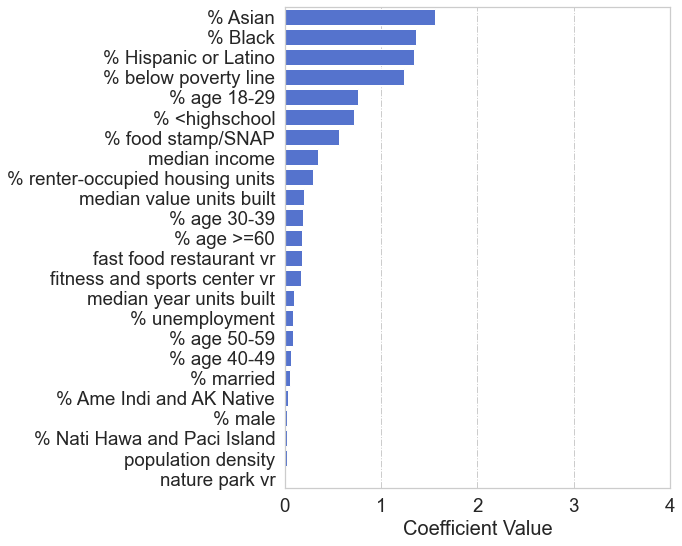

In [19]:
# Significant variables coef figure

coefficients = model_complete.params[1:]
coef_data = pd.DataFrame()
coef_data["Feature"] = coefficients.index
coef_data["Coefficient"] = coefficients.values
coef_data["Coefficient"] = coef_data["Coefficient"].apply(lambda x : abs(x))
coef_data['Feature'][21] = 'fast food restaurant vr'
coef_data['Feature'][22] = 'fitness and sports center vr'
coef_data['Feature'][23] = 'nature park vr'
coef_data = coef_data.sort_values(by = ['Coefficient'], ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(0,4)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../OLS_coefficients_LA.png",dpi=300)

C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/2054556840.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][21] = 'fast food restaurant vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/2054556840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][22] = 'fitness and sports center vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_27420/2054556840.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

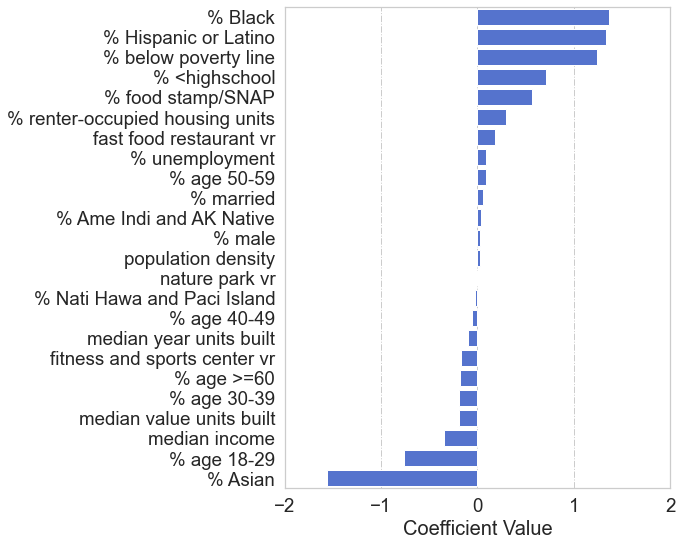

In [20]:
# Significant variables coef figure 2

coefficients = model_complete.params[1:]
coef_data = pd.DataFrame()
coef_data["Feature"] = coefficients.index
coef_data["Coefficient"] = coefficients.values
# coef_data["Coefficient"] = coef_data["Coefficient"].apply(lambda x : abs(x))
coef_data['Feature'][21] = 'fast food restaurant vr'
coef_data['Feature'][22] = 'fitness and sports center vr'
coef_data['Feature'][23] = 'nature park vr'
coef_data = coef_data.sort_values(by = ['Coefficient'], ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,2)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_LA.png",dpi=300)

In [21]:
coef_data_si = coef_data[~((coef_data['Feature'] == '% Ame Indi and AK Native') | (coef_data['Feature'] == '% Nati Hawa and Paci Island')| (coef_data['Feature'] == '% male')| (coef_data['Feature'] == '% married')| (coef_data['Feature'] == '% age 40-49')| (coef_data['Feature'] == '% age 50-59')|(coef_data['Feature'] == 'population density')|(coef_data['Feature'] == 'nature park vr'))]
coef_data_si

,Feature,Coefficient
0,% Black,1.366014
4,% Hispanic or Latino,1.337495
15,% below poverty line,1.239607
12,% <highschool,0.714968
16,% food stamp/SNAP,0.562770
19,% renter-occupied housing units,0.295246
21,fast food restaurant vr,0.179682
14,% unemployment,0.089389
18,median year units built,-0.096391
22,fitness and sports center vr,-0.166044


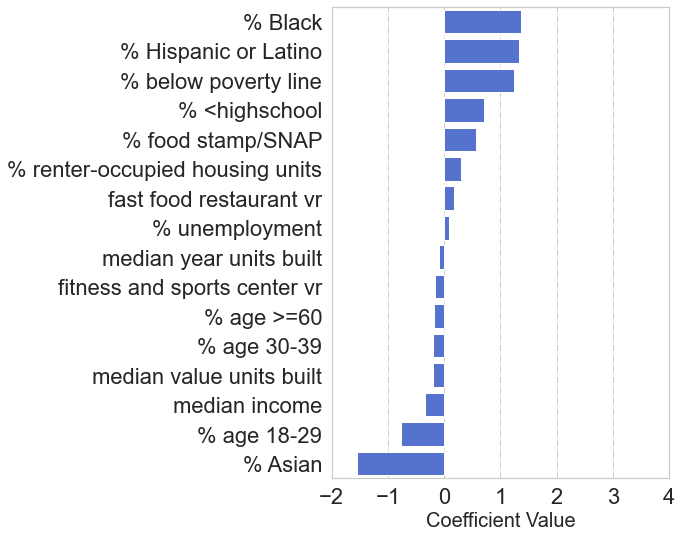

In [26]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 2)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data_si, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,4)
import matplotlib as mb
ax.xaxis.set_major_locator(mb.ticker.MultipleLocator(1.))

plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_LA1.png",dpi=300)

17.0
41.6
16.340240720316473
41.40655858129189


<Figure size 720x576 with 0 Axes>

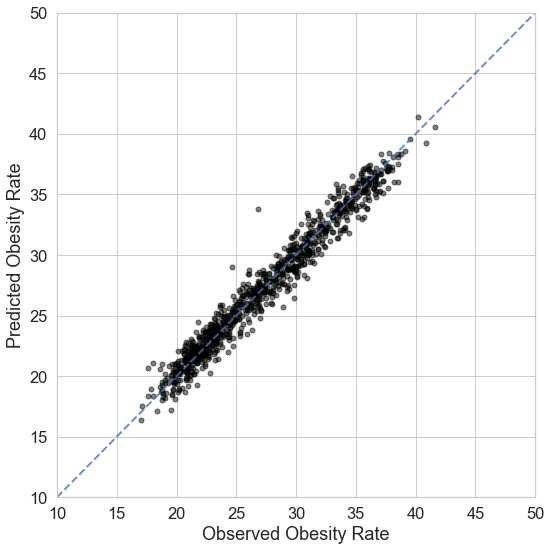

In [23]:
# Scatter and curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y))
print(np.max(y))
print(np.min(ypred2))
print(np.max(ypred2))

#scatter plot
lims = [10, 50]
prediction_scatter(y, ypred2, lims, "")
plt.tight_layout()
# plt.savefig("../OLS_pred_origin_LA.png",dpi=300)